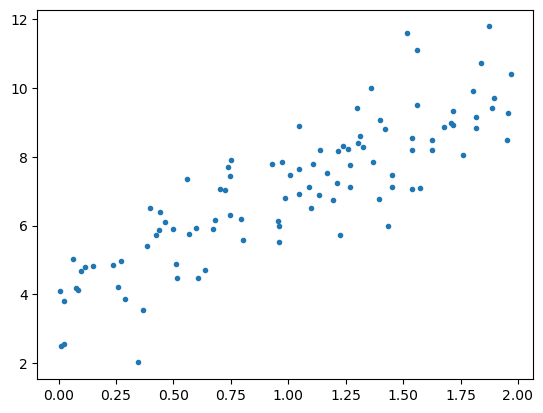

In [ ]:
# y = 3x + 4 , 경사하강법으로 3, 4를 스스로 찾아내기
# y = ax + b

import torch
import matplotlib.pyplot as plt


m = 100

x = torch.rand(m, 1) * 2  # 0 ~ 2 사이 랜덤 x 값 100개
y = x * 3 + 4 + torch.randn(m, 1) # 노이즈
 
plt.plot(x, y, '.')

In [ ]:
# 파라미터 선언
a = torch.tensor(1., requires_grad=True) # 처음엔 a = 1로 시작 (틀린 값)
b = torch.tensor(2., requires_grad=True) # 처음엔 b = 2로 시작 (틀린 값)

# 옵티마이저 (Adam) - 최적화 하는 수식
opt = torch.optim.Adam([a, b], lr = 0.1)

# 로스 함수 (MSE)
loss_fn = torch.nn.MSELoss()

# 반복문
# epoch
# step
# 20개씩 가져오기
# 500 epoch 반복
#  └── 매 epoch: 데이터 100개를 랜덤하게 섞음
#    └── 5 step 반복 (20개씩 나눠서 학습)
#        ├── pred = a * bx + b    → 현재 a,b로 예측
#        ├── loss = MSE(pred, by) → 예측이 얼마나 틀렸는지
#        ├── zero_grad()          → 이전 gradient 초기화
#        ├── loss.backward()      → 어떻게 수정해야 할지 계산
#        └── opt.step()           → a, b 조금씩 수정

for epoch in range(500):
    i = torch.randperm(m) # np.random.permutation(m)

    for step in range(5):
        bi = i[step * 20 : (step + 1) * 20]
        bx = x[bi]
        by = y[bi]
        
        # 현재 파라미터를 이용해서 예측값을 구하고 f(x) = ax + b
        pred = a * bx + b
        
        # 에러를 구하고
        loss = loss_fn(pred, by)
        
        # 에러에 대해서 미분
        opt.zero_grad()
        loss.backward()
        
        # update
        opt.step()

print(a, b)

# 최종 a = 3, b = 4  -> 정답에 가까워짐
# 틀린 값 (a = 1, b = 2)에서 시작해서, 오차를 줄이는 방향으로 조금씩 수정하다 보면
# 정답 (a = 3, b = 4) 에 도달한다.

tensor(3.0715, requires_grad=True) tensor(3.9457, requires_grad=True)


In [ ]:
torch.linalg.pinv(torch.cat([x, x**0], axis=1)) @ y
#np.linalg.pinv(np.c_[x, x**0]) @ y

In [26]:
# generator

a = torch.arange(20).reshape(-1, 2)
loader = torch.utils.data.DataLoader(a, batch_size=3)

for i in loader:
    print(i)

tensor([[0, 1],
        [2, 3],
        [4, 5]])
tensor([[ 6,  7],
        [ 8,  9],
        [10, 11]])
tensor([[12, 13],
        [14, 15],
        [16, 17]])
tensor([[18, 19]])
